# **Music Recommendation System using Hierachical Bandits**
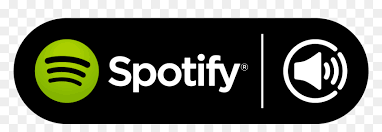

## **Import Libraries**

In [274]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import scipy.stats as spst

from collections import defaultdict

## **Read Data**

In [275]:
data = pd.read_csv("data/Spotify-2000.csv")
data.head()

Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68               201            94            3          71  
1        17       81               207            17            7          39  
2         7       52               341             2           17          69  
3         3       37               269             0            4          76  
4        10       87               256             1            3          59

In [276]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null object
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(11), object(4)
memory usage: 233.8+ KB
None


## **Characteristics of Different Genres**

This dataset contains the audio features for different songs along with the audio features for different genres. We can use this information to compare different genres and understand their unique differences in sound.

In [277]:
top10 = data.nlargest(10, 'Popularity')
attr = ['Energy', 'Danceability', 'Loudness (dB)', 'Beats Per Minute (BPM)',
        'Liveness', 'Valence', 'Acousticness', 'Speechiness']

fig = px.bar(top10, x='Title', y=attr, barmode='group')
fig.show()

## **Clustering Genres with K-Means**

Here, the simple K-means clustering algorithm is used to divide the genres in this dataset into ten clusters based on the numerical audio features of each genres.

In [278]:
genre_data = data.groupby('Top Genre')[attr].mean()
genre_data = genre_data.reset_index()
genre_data

Top Genre     Energy  Danceability  Loudness (dB)  \
0           acid jazz  95.000000     66.000000      -5.000000   
1        acoustic pop  28.250000     48.750000     -11.250000   
2     adult standards  42.658537     49.162602     -11.504065   
3             afropop  70.000000     68.000000     -10.000000   
4        alaska indie  22.000000     46.000000     -10.000000   
..                ...        ...           ...            ...   
144  stomp and holler  73.000000     48.000000      -5.000000   
145        streektaal  21.000000     61.000000     -20.000000   
146            trance  85.000000     60.000000      -6.000000   
147            uk pop  25.000000     53.000000     -16.000000   
148        yacht rock  92.000000     74.000000      -5.000000   

     Beats Per Minute (BPM)   Liveness    Valence  Acousticness  Speechiness  
0                 92.000000  14.000000  52.000000     13.000000    11.000000  
1                123.750000  16.500000  25.750000     58.250000     3.750000  
2                117.105691  19.243902  53.398374     51.382114     3.926829  
3                154.000000  33.000000  51.000000      8.000000     3.000000  
4                131.000000  11.000000  15.000000     90.000000     3.000000  
..                      ...        ...        ...           ...          ...  
144              102.000000  21.000000  43.000000      3.000000     3.000000  
145               98.000000   8.000000  42.000000     60.000000     3.000000  
146              138.000000   6.000000   9.000000      1.000000     6.000000  
147               82.000000  12.000000  34.000000     52.000000     3.000000  
148              129.000000   8.000000  93.000000     11.000000     4.000000  

[149 rows x 9 columns]

In [279]:
n_clusters = 20
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=n_clusters))])
X = genre_data[attr]
cluster_pipeline.fit(X)
genre_data['Cluster'] = cluster_pipeline.predict(X)

In [280]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['Top Genre'] = genre_data['Top Genre']
projection['Cluster'] = genre_data['Cluster']

fig = px.scatter(projection, x='x', y='y', color='Cluster', hover_data=['x', 'y', 'Top Genre'])
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 149 samples in 0.000s...
[t-SNE] Computed neighbors for 149 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 149 / 149
[t-SNE] Mean sigma: 1.171660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.841225
[t-SNE] KL divergence after 1000 iterations: 0.516459


In [281]:
clusters = [None] * n_clusters
n_genres = [None] * n_clusters
for i in range(n_clusters):
    clusters[i] = genre_data[genre_data['Cluster'] == i]
    l = len(np.unique(clusters[i]['Top Genre']))
    n_genres[i] = l

print(n_genres)
print(clusters[0]['Top Genre'])

[16, 18, 3, 5, 3, 4, 2, 10, 4, 24, 10, 1, 6, 20, 1, 9, 3, 3, 6, 1]
3                      afropop
11        alternative pop rock
23             australian rock
24                   austropop
48                   candy pop
69     contemporary vocal jazz
71                   dance pop
72                  dance rock
76                       disco
85                  dutch prog
89                     electro
94                     europop
98                        funk
133               new wave pop
136                        pop
143                  soft rock
Name: Top Genre, dtype: object


In [282]:
data['Cluster'] = 0
for i in range(len(data)):
    genre = data['Top Genre'][i]
    genre_row = genre_data[genre_data['Top Genre'] == genre]
    data['Cluster'][i] = genre_row['Cluster']
data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  \
0        11       68               201            94            3          71   
1        17       81               207            17            7          39   
2         7       52               341             2           17          69   
3         3       37               269             0            4          76   
4        10       87               256             1            3          59   

   Cluster  
0        9  
1        9  
2        4  
3       13  
4        9

## **Build Recommender System**

In [378]:
 # all songs -> cluster i -> genre j -> artist k -> song s
def init_info():
    Qs = {}
    arms = {}

    Qs['root'] = np.zeros(n_clusters)
    arms['root'] = np.zeros(n_clusters)

    cluster_gb = data.groupby('Cluster')
    cluster_names = cluster_gb.groups.keys()

    cluster_rewards = [0] * len(cluster_names)
    genre_rewards = [None] * len(cluster_names)
    artist_rewards = [None] * len(cluster_names)
    song_rewards = [None] * len(cluster_names)

    for i, c in enumerate(cluster_names):
        cluster_data = cluster_gb.get_group(c)
        genre_gb = cluster_data.groupby('Top Genre')
        genre_names = genre_gb.groups.keys()

        Qs[(i)] = np.zeros(len(genre_names))
        arms[(i)] = np.zeros(len(genre_names))

        genre_rewards[i] = [0] * len(genre_names)
        artist_rewards[i] = [None] * len(genre_names)
        song_rewards[i] = [None] * len(genre_names)

        for j, g in enumerate(genre_names):
            genre_data = genre_gb.get_group(g)
            artist_gb = genre_data.groupby('Artist')
            artist_names = artist_gb.groups.keys()

            Qs[(i, j)] = np.zeros(len(artist_names))
            arms[(i, j)] = np.zeros(len(artist_names))

            artist_rewards[i][j] = [0] * len(artist_names)
            song_rewards[i][j] = [None] * len(artist_names)

            for k, a in enumerate(artist_names):
                artist_data = artist_gb.get_group(a)
                song_gb = artist_data.groupby('Title')
                song_names = song_gb.groups.keys()

                song_rewards[i][j][k] = [0] * len(song_names)

                for l, s in enumerate(song_names):
                    pop = artist_data[artist_data['Title']==s]['Popularity']
                    reward = int(pop)

                    cluster_rewards[i] += reward
                    genre_rewards[i][j] += reward
                    artist_rewards[i][j][k] += reward
                    song_rewards[i][j][k][l] += reward

                Qs[(i, j, k)] = np.zeros(len(song_names))
                arms[(i, j, k)] = np.zeros(len(song_names))

    tree_rewards = [cluster_rewards, genre_rewards, artist_rewards, song_rewards]
    return Qs, arms, tree_rewards

In [379]:
M, N = 1, 100
max_level = 3

#epsilons = np.array([.05,.1,.15,.2,.25])
Qs, arms, tree_rewards = init_info()
cluster_rewards, genre_rewards, artist_rewards, song_rewards = tree_rewards


In [383]:
def e_greedy_bandit(epsilon, indices):
    
    level = len(indices)
    
    if level == 0:
        branch = 'root'
    else:
        branch = tuple(indices) if level > 1 else indices[0]

    Q = Qs[branch]
    arm = arms[branch]
    K = Q.size
    is_leaf = (max_level == level)

    # Epsilon-greedy action selection
    if np.random.random() >= epsilon or K == 1:
        idx = np.argmax(Q)
    else:
        idx = np.random.randint(0, K)

    if is_leaf:
        # Reward and Q value update
        c, g, a = indices
        means = song_rewards[c][g][a]
        reward = means[idx]
    else:
        _, reward, _, _ = e_greedy_bandit(epsilon, indices+[idx])

    arm[idx] += 1
    Q[idx] += 1/arm[idx]*(reward-Q[idx])

    #print(indices, idx, reward)
    
    return idx, reward, Q, arm


def e_greedy_run(epsilon, M, N, indices):
    
    level = len(indices)
    if level == 0:
        means = cluster_rewards
    elif level == 1:
        i = indices[0]
        means = genre_rewards[i]
    elif level == 2:
        i, j = indices
        means = artist_rewards[i][j]
    elif level == 3:
        i, j, k = indices
        means = song_rewards[i][j][k]
    
    best = np.argmax(means)

    percentage = np.zeros((M, N))
    regret = np.zeros((M, N))
    bestQ = np.zeros((M, N))

    # Keep track of action values and action counts
    for m in range(M):

        for n in range(N):
            idx, _, Q, arm = e_greedy_bandit(epsilon, indices)   

            # Track frequency of choosing best arm and actual regret
            percentage[m, n] = arm[best]/(n+1)
            regret[m, n] = means[best]-means[idx]
            bestQ[m, n] = Q[best]
            print(best, idx)
    return percentage, regret, bestQ

In [384]:
e_greedy_run(0.7, 1, 1000000, [])

9 19
9 2
9 10
9 10
9 4
9 18
9 17
9 3
9 7
9 5
9 14
9 1
9 14
9 14
9 19
9 14
9 14
9 17
9 14
9 17
9 14
9 19
9 7
9 14
9 15
9 12
9 14
9 14
9 1
9 0
9 12
9 10
9 3
9 14
9 0
9 1
9 14
9 11
9 14
9 14
9 5
9 1
9 14
9 14
9 14
9 14
9 14
9 14
9 5
9 14
9 18
9 14
9 14
9 14
9 14
9 14
9 3
9 14
9 14
9 9
9 14
9 14
9 12
9 7
9 9
9 10
9 14
9 9
9 10
9 6
9 10
9 14
9 17
9 12
9 12
9 14
9 14
9 17
9 15
9 14
9 19
9 12
9 15
9 6
9 0
9 13
9 14
9 14
9 9
9 15
9 14
9 14
9 12
9 14
9 19
9 3
9 3
9 7
9 11
9 14
9 17
9 0
9 15
9 14
9 14
9 17
9 6
9 14
9 14
9 3
9 7
9 14
9 15
9 10
9 14
9 13
9 5
9 14
9 10
9 14
9 11
9 14
9 14
9 3
9 0
9 19
9 6
9 15
9 14
9 11
9 19
9 7
9 1
9 11
9 0
9 14
9 3
9 6
9 19
9 13
9 14
9 10
9 14
9 0
9 2
9 14
9 7
9 10
9 15
9 14
9 14
9 14
9 14
9 14
9 0
9 14
9 13
9 13
9 14
9 5
9 19
9 14
9 9
9 8
9 17
9 12
9 14
9 0
9 12
9 12
9 17
9 9
9 14
9 4
9 13
9 14
9 9
9 14
9 12
9 14
9 10
9 0
9 16
9 12
9 19
9 12
9 11
9 12
9 10
9 14
9 14
9 0
9 6
9 19
9 14
9 17
9 14
9 9
9 14
9 14
9 14
9 8
9 6
9 16
9 18
9 14
9 14
9 14
9 19
9 11
9 14
9 